In [304]:
!pip install parsel

In [305]:
import urllib.request
#import parsel
from html.parser import HTMLParser
from urllib.parse import urlparse
from parsel import Selector
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

In [306]:
with urllib.request.urlopen('https://www.indiatoday.in/') as response:
    html = response.read()

In [307]:
selector = Selector(text=html.decode("utf-8",errors='ignore') )
pol = selector.css('body').get()

In [308]:
class MyHTMLParser(HTMLParser):
    def handle_data(self, data):
        if data.strip()!="":
            pass

In [309]:
parser = MyHTMLParser()

In [310]:
parser.feed(pol.replace("\\n",""))

In [311]:
type(parser)

__main__.MyHTMLParser

In [312]:
def getDataFromUrl(url):
    with urllib.request.urlopen(url) as response:
        html = response.read()
    return html

In [313]:
def getSelector(html):
    selector = Selector(text=html.decode("utf-8",errors='ignore'))
    return selector

In [314]:
def getBody(selector):
    pol = selector.css('body').get()
    return pol

In [315]:
def getUrls(selector):
    urls = selector.xpath('//a/@href').getall()
    return urls

In [316]:
def processQueueElement(url):
    parsedUrl = urlparse(url)
    data = getDataFromUrl(url)
    selector = getSelector(data)
    body = getBody(selector)
    urls = getUrls(selector)
    for idx,i in enumerate(urls):
        if i.startswith("/"):
            urls[idx] = parsedUrl.scheme+'://'+parsedUrl.netloc+i
            #print(urls[idx])
    return urls

In [344]:
result={'source':[],'dest':[]} 
class graphLinkInfo :
    def storeGraphlink(graph):
        edges = nx.to_edgelist(graph)
        for edge in edges:
            result['source'].append(edge[0])
            result['dest'].append(edge[1])
        

In [361]:
seedurls=['https://www.indiatoday.in/','https://www.geeksforgeeks.org/',
         'https://www.imdb.com/','https://www.amazon.in/','https://gadgets.ndtv.com/']
graph = nx.DiGraph()
allURLs=[]
for link in seedurls:
    try:
        urllib.request.urlopen(link)
        urls = processQueueElement(link)
        

        for i in urls:
            if not i.startswith("#"):
                graph.add_edge(link,i)
        allURLs.extend(graph.nodes())
        # use the graph to store source -> target link information for each of the 'links'
        graphLinkInfo.storeGraphlink(graph)
    except urllib.error.HTTPError as err:
       
        pass


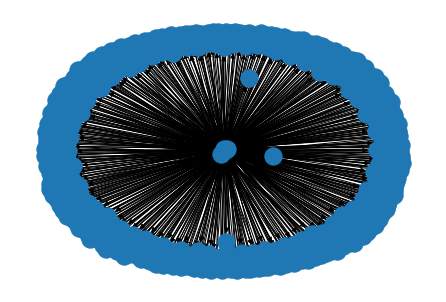

In [348]:
allURLs=graph.nodes()
nx.draw(graph)

In [349]:
#graph.in_edges(urls[1])
def calculatePageRank(node,visited):

    visited.add(node)
    indeg = graph.in_degree(node)
    try:
        if(indeg >= 1):
            indeg=indeg
    except TypeError:
        indeg=0    
    return indeg


In [350]:
outNodes=[]
count=0
for node in graph.nodes():
    outdeg=graph.out_degree(node)
    try:
        if(outdeg>=1):
            outNodes.append(node)
        else:
            count=count+1
    except TypeError:
            outdeg=0
            count=count+1


In [351]:
rank=[]
sortedRank=[]
docId=[]
i=0
for node in graph.nodes():
    docId.append(i)
    i+=1
    rank.append(calculatePageRank(node,{-1}))
    sortedRank = [x for _,x in sorted(zip(rank,docId),reverse=True)]


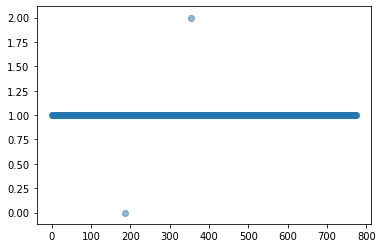

In [352]:
plt.scatter(sortedRank,rank, alpha=0.5)

In [353]:
len(graph.nodes())
    

775

In [354]:
def CalculatePR(object):
    nodeLists=[]
    for nodes in object.nodes():
        nodeLists.append(nodes)

    pgrnk=[float(1/len(object.nodes()))]*len(object.nodes())
    for iter in range(0,3):
        for node in object.nodes():
            innodes = object.in_edges(node)
            for i in innodes:
                if not i[0]==node:
                    pgrnk[nodeLists.index(node)]+=pgrnk[nodeLists.index(i[0])]
    return pgrnk

In [360]:

subGraphOut=graph.subgraph(outNodes)
graphPR=CalculatePR(graph)
subGraphPR=CalculatePR(subGraphOut)


Text(27.125, 0.5, 'PageRank')

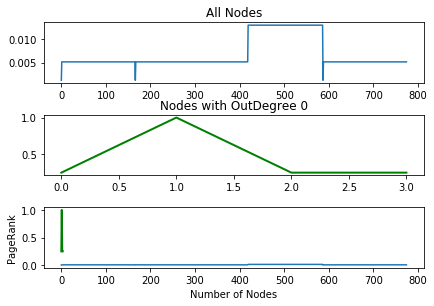

In [356]:
x=list(range(0,len(graph.nodes())))
x1=list(range(0,len(subGraphOut.nodes())))

fig,axs=plt.subplots(3)

plt.tight_layout()
axs[0].plot(x,graphPR)
axs[1].plot(x1,subGraphPR, marker='', color='green', linewidth=2)
axs[2].plot(x,graphPR)
axs[2].plot(x1,subGraphPR, marker='', color='green', linewidth=2)
axs[0].title.set_text('All Nodes')
axs[1].title.set_text('Nodes with OutDegree 0')
plt.xlabel('Number of Nodes') 
# naming the y axis 
plt.ylabel('PageRank') 



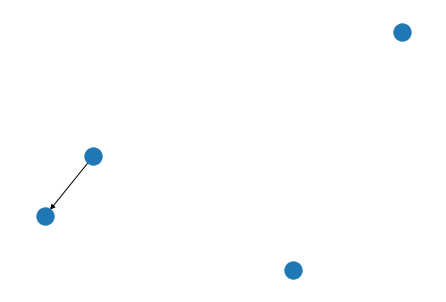

In [357]:
nx.draw(subGraphOut)

In [358]:
def CalculatePRMatMul(object):

    nodeLists=[]
    matrix=np.zeros((len(object.nodes()),len(object.nodes())))
    for nodes in object.nodes():
        nodeLists.append(nodes)

    for node in object.nodes():
        outnodes = object.out_edges(node)

        outdeg = object.out_degree(node)

        for i in outnodes:
                matrix[nodeLists.index(i[1])][nodeLists.index(i[0])]=float(1/outdeg)
                
    x=np.ones((len(object.nodes()),1))
    for iter in range (0,3):
        x=np.dot(matrix,x)
    return  x

Text(27.125, 0.5, 'PageRank')

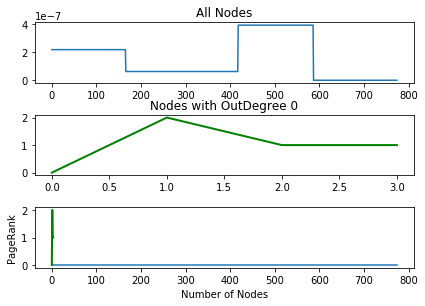

In [359]:
MMgraph=CalculatePRMatMul(graph)  
MMsubGraph=CalculatePRMatMul(subGraphOut)
fig,axs=plt.subplots(3)

plt.tight_layout()
axs[0].plot(x,MMgraph)
axs[1].plot(x1,MMsubGraph, marker='', color='green', linewidth=2)
axs[2].plot(x,MMgraph)
axs[2].plot(x1,MMsubGraph, marker='', color='green', linewidth=2)
axs[0].title.set_text('All Nodes')
axs[1].title.set_text('Nodes with OutDegree 0')
plt.xlabel('Number of Nodes') 
# naming the y axis 
plt.ylabel('PageRank') 

